Plotting of sampling correlation diagrams

采样相关图的绘制

In [6]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import myfunction as mf
path_data_raw = "C:/Users/dell/OneDrive/file/"
path_country_nc = "C:/Users/dell/OneDrive/file/nc/"
path_one_spdb = 'C:/Users/dell/OneDrive/file/SPDB/'

drive_letter = 'E:'
path_opp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_pre = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_match = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/match/"
path_picture = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part0_treat/pretreatment/"
path_temp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/temp/"

path_ng_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/ng_fig/"
list_color = ["#ee877c", "#8bd0e3", "#6abeae", "#808eaf", "#f7bba8", "#acb4cc", "#b5e0d5", "#e86462", "#a89687"]

In [8]:
import pandas as pd

# Processing data
# 处理数据
def lat_lon_to_grid(lat, lon, grid_size=1):
    return round(lat / grid_size) * grid_size, round(lon / grid_size) * grid_size

lr_outlier = pd.read_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\lr_outlier.csv')
sws7_outlier = pd.read_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\sws7_outlier.csv')

lr_outlier[['lat_grid', 'lon_grid']] = lr_outlier.apply(lambda row: lat_lon_to_grid(row['lat'], row['lon']), axis=1, result_type='expand')
sws7_outlier[['lat_grid', 'lon_grid']] = sws7_outlier.apply(lambda row: lat_lon_to_grid(row['lat'], row['lon']), axis=1, result_type='expand')

lr_outlier_grouped = lr_outlier.groupby(['lat_grid', 'lon_grid'])['n'].sum().reset_index().rename(columns={'n': 'n_sum'})
sws7_outlier_grouped = sws7_outlier.groupby(['lat_grid', 'lon_grid'])['n'].sum().reset_index().rename(columns={'n': 'n_sum'})

lr_outlier_grouped = lr_outlier_grouped.rename(columns={'lat_grid': 'lat', 'lon_grid': 'lon'})
sws7_outlier_grouped = sws7_outlier_grouped.rename(columns={'lat_grid': 'lat', 'lon_grid': 'lon'})

print(lr_outlier_grouped)
print(sws7_outlier_grouped)
lr_outlier_grouped.to_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\lr_outlier_group.csv',index=False)
sws7_outlier_grouped.to_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\sws7_outlier_group.csv',index=False)

     lat  lon  n_sum
0    -42  148   1065
1    -41  174     38
2    -41  175    115
3    -36  174    492
4    -35  174     55
..   ...  ...    ...
688   81   48     60
689   82  -17     30
690   82   61     70
691   82   63     21
692   83  -46    120

[693 rows x 3 columns]
      lat  lon  n_sum
0     -76   37     20
1     -75   37     10
2     -75   38     10
3     -75   39     20
4     -74   37     20
...   ...  ...    ...
1310   80   -2      6
1311   80   -1     10
1312   80    5      3
1313   81  -11      6
1314   87 -173      3

[1315 rows x 3 columns]


In [1]:
import os
import pandas as pd
from netCDF4 import Dataset
import numpy as np

def change_to_nc(path_final, path_data, data_type, str_colname='value'):
    name_new_file = f'{data_type}_{str_colname}.nc'
    df = pd.read_csv(path_data + data_type + '.csv')
    df = df[['lon', 'lat', str_colname]]
    nc_file = Dataset(path_final + name_new_file, 'w', format='NETCDF4')

    lon = np.arange(-180, 180, 1)
    lat = np.arange(-90, 90, 1)
    nc_file.createDimension('lon', len(lon))
    nc_file.createDimension('lat', len(lat))
    lon_var = nc_file.createVariable('lon', 'f4', 'lon')
    lat_var = nc_file.createVariable('lat', 'f4', 'lat')
    lon_var[:] = lon
    lat_var[:] = lat
    value_var = nc_file.createVariable(str_colname, 'f4', ('lat', 'lon'))
    value_data = np.full((len(lat), len(lon)), np.nan)
    for index, row in df.iterrows():
        if row['lon'] != -180 and row['lon'] != 180 and row['lat'] != -90 and row['lat'] != 90:
            value_data[int(row['lat'] + 90), int(row['lon'] + 180)] = row[str_colname]
    value_var[:, :] = value_data
    nc_file.close()
    return print('over')

In [2]:
path_final = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part1_describe/sample_map/'
path_data = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part1_describe/sample_map/data/'
list_data_type = ['sws7_outlier_group', 'lr_outlier_group']
list_value_type = ['n_sum']

for value_type in list_value_type:
    for data_type in list_data_type:
        change_to_nc(path_final, path_data, data_type, value_type)

over
over


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_year_num(df_data, save_path, y_max, x_str, y_str):
    df_bar = df_data.copy()
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(12, 4))

    sns.set_color_codes("muted")
    sns.barplot(x=x_str, y=y_str, data=df_bar,
                label="Data volume", color="b")

    
    ax.set_yscale("log")
    ax.set(ylim=(0, y_max), xlabel="", ylabel="")
    ax.yaxis.grid(True)

    ax.set_ylabel("Number", fontsize=18) 
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16, rotation=90)
    plt.rcParams['font.family'] = 'Arial'
    plt.subplots_adjust(left=0.1,right=0.95,bottom=0.21,top=0.8)
    plt.savefig(save_path, dpi = 300)
    sns.despine(right=True, top=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_36804\1728868952.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0, y_max), xlabel="", ylabel="")


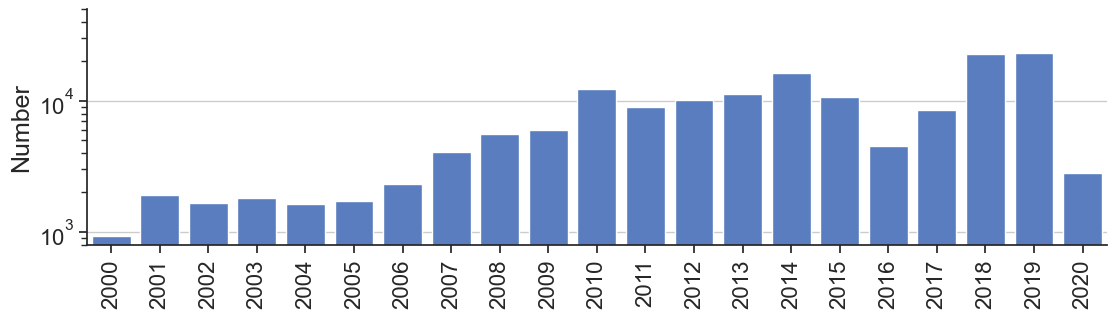

In [10]:
lr_outlier = pd.read_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\lr_outlier.csv')
df_lr_year_gb = lr_outlier.groupby(["year"],as_index=False).agg(n=("n","sum"))
lr_save_path = path_ng_fig + 'sufig2_year_lr_bar' + ".svg"
draw_year_num(df_lr_year_gb, lr_save_path, 50000, 'year', 'n')

C:\Users\dell\AppData\Local\Temp\ipykernel_36804\1728868952.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0, y_max), xlabel="", ylabel="")


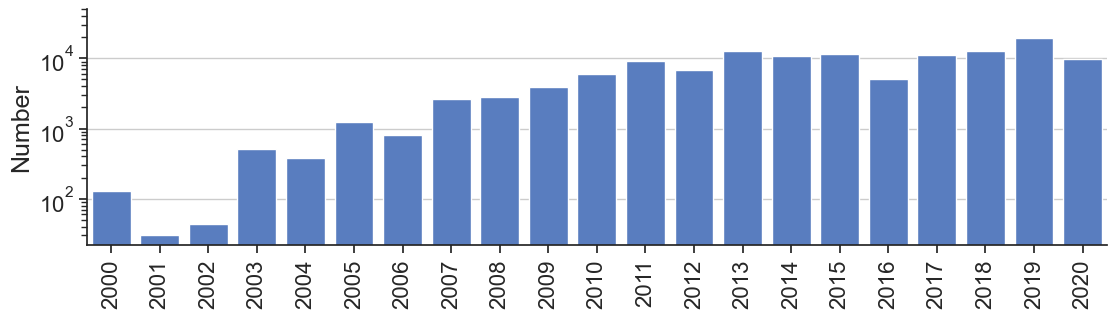

In [11]:
sws7_outlier = pd.read_csv('E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part1_describe\\sample_map\\data\\sws7_outlier.csv')

df_sw_year_gb = sws7_outlier.groupby(["year"],as_index=False).agg(n=("n","sum"))
sw_save_path = path_ng_fig + 'sufig2_year_sw_bar' + ".svg"
draw_year_num(df_sw_year_gb, sw_save_path, 50000, 'year', 'n')